In [1]:
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt


Estimated coefficients:
b_0 = 1.2181818181818187         
b_1 = 1.0363636363636364


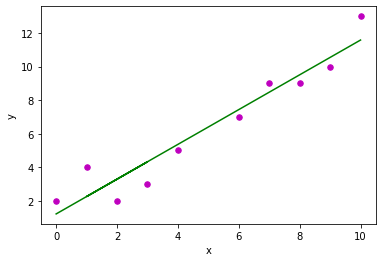

In [2]:
# Example of linear regression (manually)

# Function to estimate the coefficients of a linear regression with two parameters
#
# Input:
#       x        :   points x-values (array)
#       y        :   points y-values (array)
#
# Output: 
#   (b_0, b_1)   :   Coefficient vector (bias, slope)

def estimate_coef(x, y):
    # number of observations/points
    n = np.size(x)

    # mean of x and y vector
    m_x = np.mean(x)
    m_y = np.mean(y)

    # calculating cross-deviation and deviation about x
    SS_xy = np.sum(y*x) - n*m_y*m_x
    SS_xx = np.sum(x*x) - n*m_x*m_x

    # calculating regression coefficients
    b_1 = SS_xy / SS_xx
    b_0 = m_y - b_1*m_x

    return (b_0, b_1)


# Function to plot the results of the regression
#
# Input:
#       x        :   points x-values (array)
#       y        :   points y-values (array)
#       b        :   Coefficient vector (bias, slope)


def plot_regression_line(x, y, b):
    # plotting the actual points as scatter plot
    plt.scatter(x, y, color = "m",
            marker = "o", s = 30)

    # predicted response vector
    y_pred = b[0] + b[1]*x

    # plotting the regression line
    plt.plot(x, y_pred, color = "g")

    # putting labels
    plt.xlabel('x')
    plt.ylabel('y')

    # function to show plot
    plt.show()
    
    
# Main function to call the fitting function and plot the results with the data
def main():
    # observations / data
    x = np.array([0, 3, 2, 1, 4, 6, 7, 8, 9, 10])
    y = np.array([2, 3, 2, 4, 5, 7, 9, 9, 10, 13])

    # estimating coefficients
    b = estimate_coef(x, y)
    print("Estimated coefficients:\nb_0 = {} \
        \nb_1 = {}".format(b[0], b[1]))

    # plotting regression line
    plot_regression_line(x, y, b)

    
if __name__ == "__main__":
    main()
